# Import delle librerie

In [45]:
import numpy as np
import sys
import random 
import matplotlib.pyplot as plt

# Implementazione della funzione di evoluzione differenziale

<img src="/Users/raffaelerusso/Desktop/RO-progetto/Codice/images/Ackley.gif" width="500" align="center">

In [46]:
def de(f,len_x,lb_x,ub_x,NP=10,F=0.5,CR=0.5,it=100):

   x = np.random.uniform(low=lb_x, high=ub_x, size=(NP,len_x))
   u = np.zeros(len_x)
   trial = np.zeros(len_x)
   opt = sys.maxsize
   x_opt = np.zeros(len_x)*sys.maxsize
   hist_cost = np.zeros(it)

   for k in range(it):
     for i in range(NP): 
         
           r = random.sample([k for k in range(NP) if k!=i],3)
           r1 = r[0]
           r2 = r[1]
           r3 = r[2]
           u = x[r1] + F * (x[r2]-x[r3])
           u = np.clip(u, lb_x, ub_x)
           idx = np.random.rand(len_x)
           for id in range(len(idx)):
               if idx[id] < CR:
                trial[id] = u[id]
               else:
                    trial[id] = x[i][id]
               
           if(f(trial)<f(x[i,:])):
                x[i] = trial
           
           curr = f(x[i])
           if(curr<opt):
              opt = curr
              x_opt = x[i]

     hist_cost[k] = opt 
              
   return opt, x_opt, hist_cost

# Funzioni da minimizzare

## First De Jong function (Sphere)

$\min_x \left(f_1(x)= \sum_{i = 0}^{2} x_i^2\right)$ con $x_i \in [-100, 100]$ \
Valore ottimo: $ z^* = 0 $ \
Soluzione ottima: $x^* = [0, 0, 0]$

In [47]:
def f1(x):

    sum = 0
    for e in x:
        sum += e**2
    return sum


Z =  0.0
X =  [ 0.  0. -0.]


Text(0, 0.5, 'cost function')

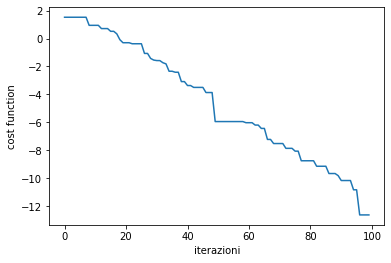

In [48]:
it = 100
opt, x_opt, hist = de(f1,3,lb_x=-100,ub_x=100,NP=100,F=0.5,CR=0.5,it=it)


print("Z = ", round(opt,ndigits=3))
print("X = ", np.round(x_opt,decimals=3))

plt.figure(1)
plt.plot(range(it), np.log10(hist))
plt.xlabel("iterazioni")
plt.ylabel("cost function")

## Second De Jong function

$ \min_x f_2(x)= 100 \times (x_0^2 -x_1)^2 + (1-x_0)^2$ con $x_j \in [-2.048, 2.048]$\
Valore ottimo: $ z^* = 0 $ \
Soluzione ottima: $x^* = [1, 1]$

In [49]:
def f2(x):
    return 100 * (x[0]**2 -x[1])**2 + (1-x[0])**2


Z =  0.0
X =  [1. 1.]


Text(0, 0.5, 'cost function')

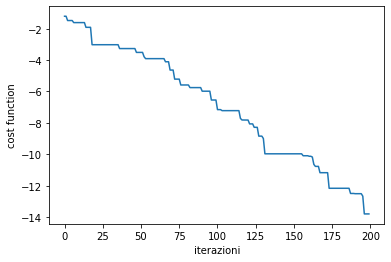

In [50]:
it = 200
opt,x_opt, hist = de(f2,2,lb_x=-2.048,ub_x=2.048,NP=100,F=0.5,CR=0.5,it=it)

print("Z = ", round(opt,ndigits=3))
print("X = ", np.round(x_opt,decimals=3))

plt.figure(1)
plt.plot(range(it), np.log10(hist))
plt.xlabel("iterazioni")
plt.ylabel("cost function")

## Third De Jong function

$\min_x \left(f_3(x)= 30 + \sum_{i = 0}^{4} \lfloor x_i \rfloor  \right)$ con $x_i \in [-5.12, 5.12]$ \
Valore ottimo: $ z^* = 0  $  \
Soluzione ottima: $x^*_i = -5 - ϵ$ con $ϵ \in [0, 0.12]  $

In [51]:
def f3(x):
    sum = 0
    for e in x:
        sum += np.floor(e)
    return 30 + sum


Z =  0.0
X =  [-5.12 -5.12 -5.12 -5.12 -5.12]


/Users/raffaelerusso/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, 'cost function')

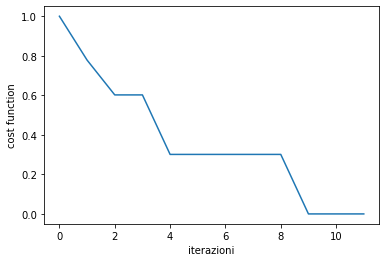

In [52]:
it = 50
opt,x_opt, hist = de(f3,5,lb_x=-5.12,ub_x=5.12,NP=100,F=0.5,CR=0.5,it=it)

print("Z = ", round(opt,ndigits=3))
print("X = ", np.round(x_opt,decimals=3))

plt.figure(1)
plt.plot(range(it), np.log10(hist))
plt.xlabel("iterazioni")
plt.ylabel("cost function")

## Ackley Function

$\min_x f4(x)= -20 exp\left(-0.2 \sqrt{\frac{1}{n} \sum_{i=1}^n x_i^2}\right) - exp\left(\frac{1}{n} \sum_{i=1}^n cos(2\pi x_i)\right) + 20 + e$  con $x_i \in [-32.768, 32.768]$ \
Valore ottimo: $ z^* = 0 $ \
Soluzione ottima: $x^* = [0... 0]$


In [53]:
from math import cos,sqrt,pi,exp
def f4(x):
 return -20.0 * exp(-0.2 * sqrt(1/len(x) * sum(x_i**2 for x_i in x)))-exp(1/len(x) * sum(cos(2 * 
  pi * x_i) for x_i in x))+ exp(1) + 20

Z =  0.0
X =  [-0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0.
  0.  0.]


Text(0, 0.5, 'cost function')

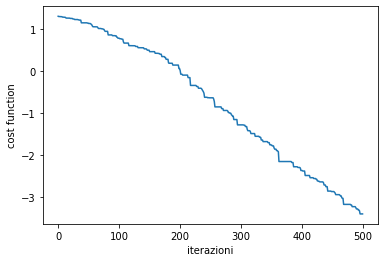

In [54]:
it = 500
opt,x_opt, hist = de(f4,20,lb_x=-32.768,ub_x=32.768,NP=100,F=0.5,CR=0.7,it=it)

print("Z = ", round(opt,ndigits=3))
print("X = ", np.round(x_opt,decimals=3))

plt.figure(1)
plt.plot(range(it), np.log10(hist))
plt.xlabel("iterazioni")
plt.ylabel("cost function")